In [40]:
using NCDatasets
using PyPlot
using PyCall
const plt = PyPlot
thecoast = ""
mpl = pyimport("matplotlib")
mpl.style.use("filament.mplstyle")
ccrs = pyimport("cartopy.crs")
cfeature = pyimport("cartopy.feature")

PyObject <module 'cartopy.feature' from '/home/ctroupin/.local/lib/python3.10/site-packages/cartopy/feature/__init__.py'>

In [23]:
theproj = ccrs.Mollweide()
datacrs = ccrs.PlateCarree()

PyObject <Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
datadir = "/home/ctroupin/data/PACE/"
datafile = joinpath(datadir, "PACE_OCI.20240901_20240930.L3m.MO.CHL.V2_0.chlor_a.0p1deg.NRT.nc")
isfile(datafile) ? @debug("ok") : @warn("Data file doesn't exist")

In [37]:
ds = NCDataset(datafile, "r") 
print(ds)
lon = ds["lon"][:]
lat = ds["lat"][:]
chloro = coalesce.(ds["chlor_a"][:,:], NaN)
@info(extrema(lon));
@info(extrema(lat));

extent = [minimum(lon), maximum(lon), minimum(lat), maximum(lat)]
    
close(ds)

Dataset: /home/ctroupin/data/PACE/PACE_OCI.20240901_20240930.L3m.MO.CHL.V2_0.chlor_a.0p1deg.NRT.nc
Group: /

Dimensions
   lat = 1800
   lon = 3600
   rgb = 3
   eightbitcolor = 256

Variables
  chlor_a   (3600 × 1800)
    Datatype:    Union{Missing, Float32} (Float32)
    Dimensions:  lon × lat
    Attributes:
     long_name            = Chlorophyll Concentration, OCI Algorithm
     units                = mg m^-3
     standard_name        = mass_concentration_of_chlorophyll_in_sea_water
     _FillValue           = -32767.0
     valid_min            = 0.001
     valid_max            = 100.0
     reference            = Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.
     display_scale        = log
     display_min          = 0.01
     display_max          = 20.0

  lat   (1800)
    Datatype:    Union{Missing, Float32} (Float32)
 

[ Info: (-179.95f0, 179.95001f0)
[ Info: (-89.950005f0, 89.95f0)


closed Dataset

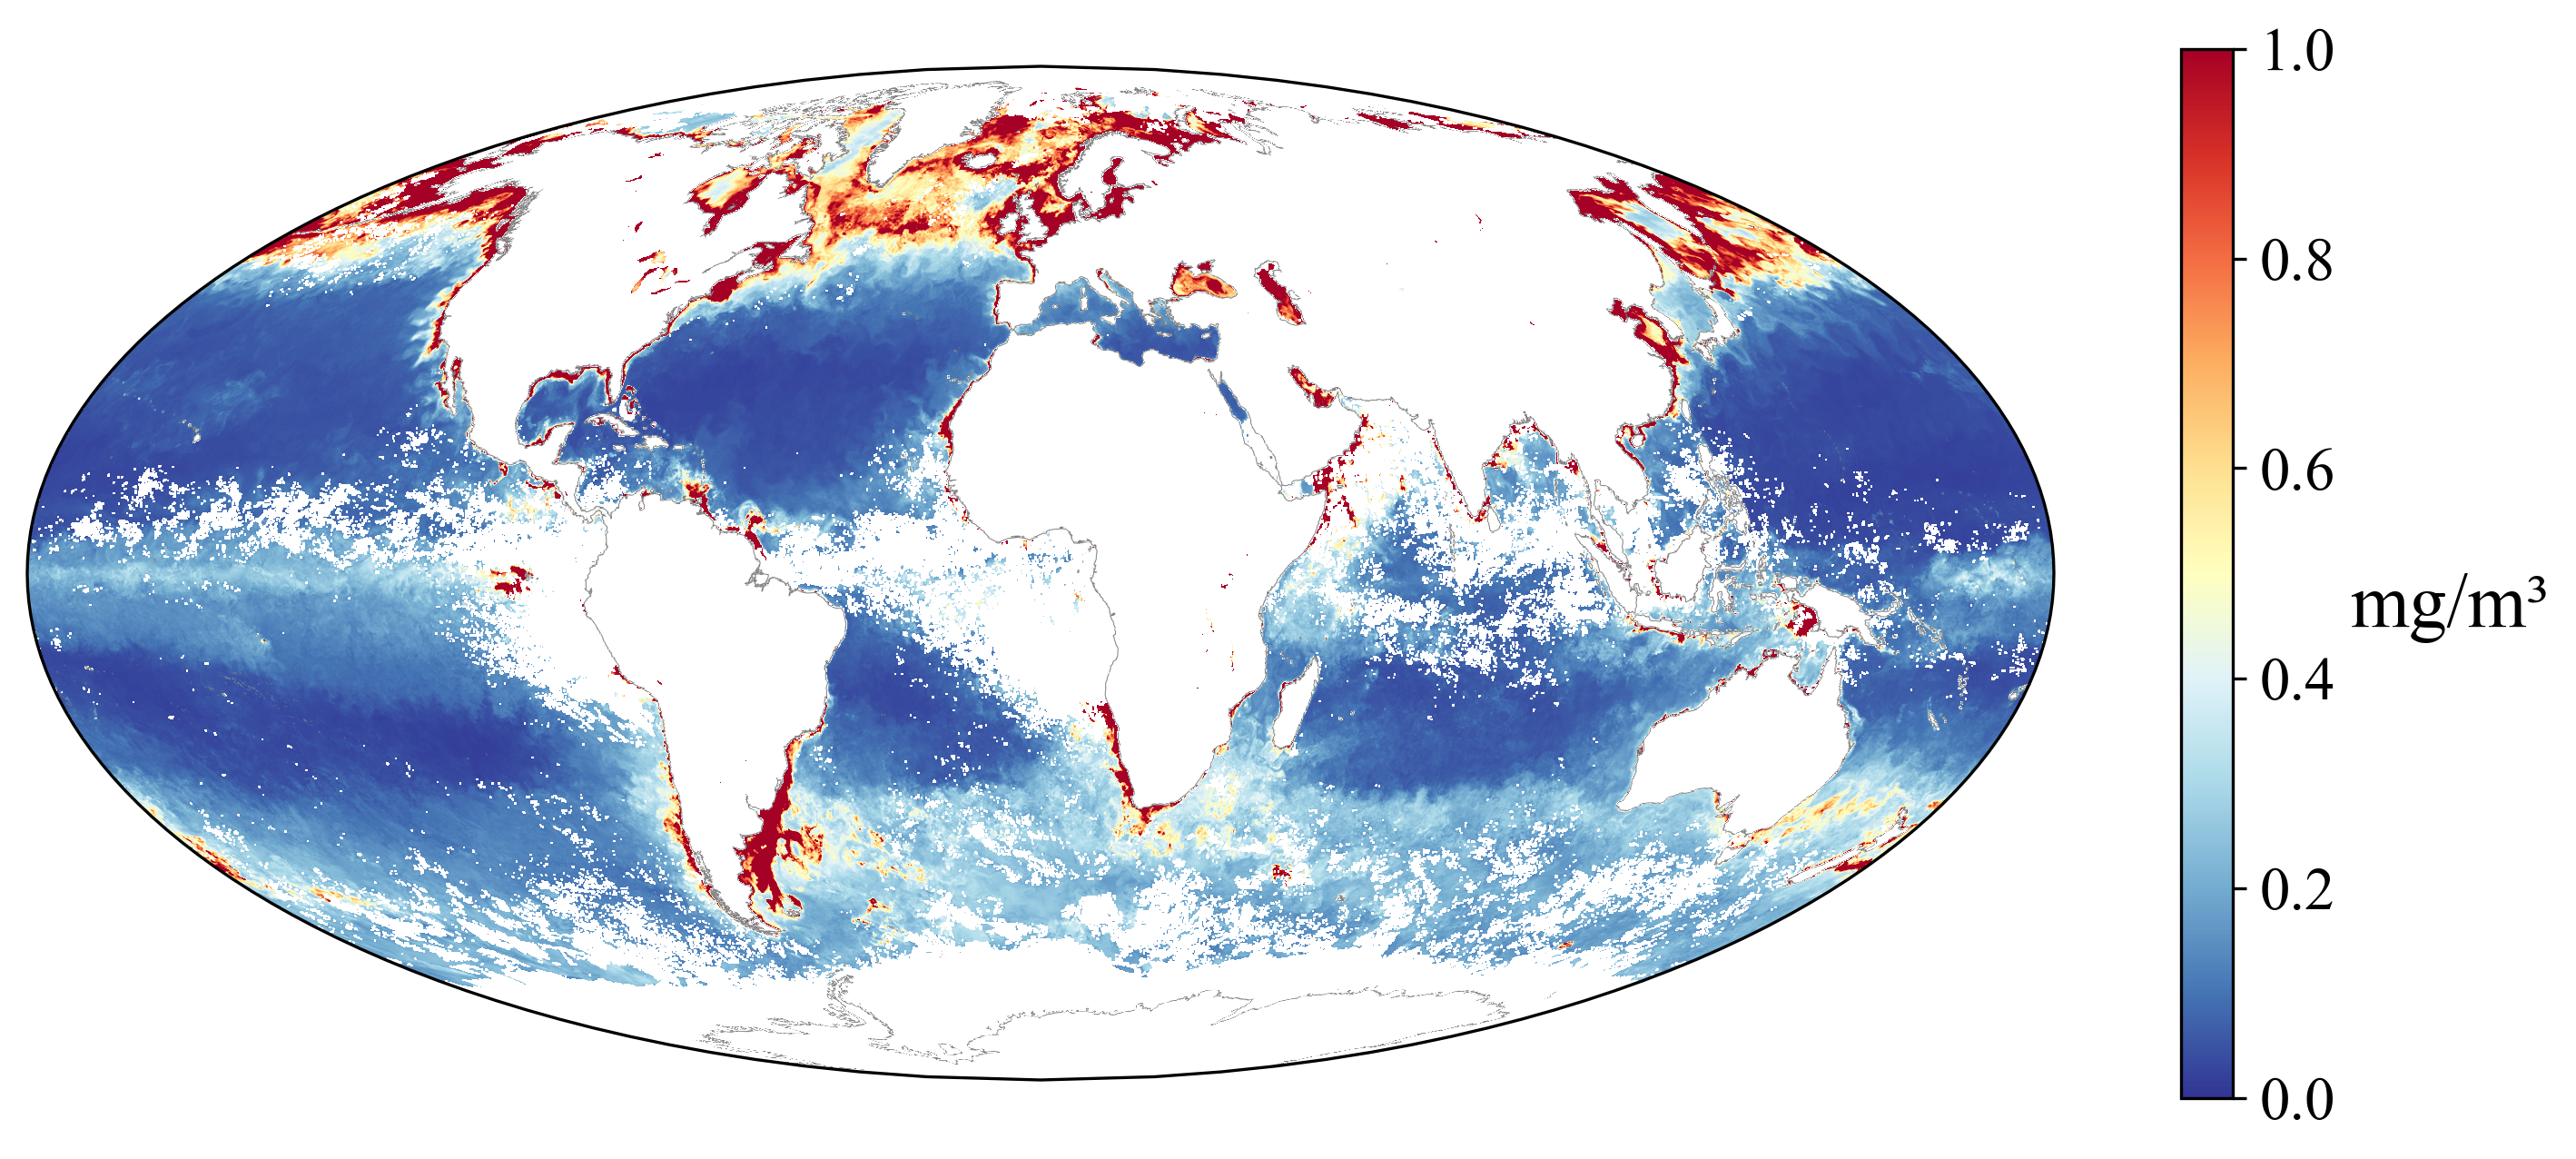

In [43]:
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(111, projection=theproj)
pcm = ax.imshow(chloro', origin="upper", extent=extent, vmin=0, vmax=1, 
    cmap=plt.cm.RdYlBu_r, transform=datacrs, regrid_shape=3600)
ax.add_wms(wms="http://ows.emodnet-bathymetry.eu/wms",
               layers=["coastlines"])
cb = plt.colorbar(pcm, shrink=.5)
cb.set_label("mg/m³", rotation=0, ha="left")
plt.savefig("../figures/chloro_PACE_september")